In [5]:
import numpy as np
# import matplotlib.pyplot as plt
# from obspy.core import read, Stream, UTCDateTime
import pygmt
import pandas as pd

In [35]:
path_to_files = '/Users/sydneydybing/StrainProject/2024/'
bsm_mda = pd.read_csv(path_to_files + 'bsm_metadata.csv')
i = np.where(bsm_mda.BNUM.values == 'B917')[0][0]
B917 = bsm_mda.iloc[[i]]
B917

,BNUM,NAME,LAT,LONG,ELEV(m),INSTALL_DATE,CH0(EofN),BSM_Depth(m),SEISMOMETER_Depth(m),PORE_DEPTH(m),DATA_START,->,DATA_END,GAP(m),L_DATE,L0(cnts),L1(cnts),L2(cnts),L3(cnts),REGION
63,B917,tonyso917bcs2008,35.3892,-117.2587,1125.9,7/14/08,306.1,162.5,Unknown,NaN,2008:196,->,Present,0.0001,2008:219,51200216,53318503,50164819,49964400,Mojave_California


In [36]:
gnss_stas = pd.read_csv(path_to_files + 'gnss_data/Ridgecrest_GNSS_2019/station_locations.txt', 
                       delimiter = '\s+', skiprows = 1, names = ['sta', 'lon', 'lat', 'elev'])
P593 = gnss_stas.iloc[[5]]
P593

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/var/folders/yg/s8qp7lfs59g_tbwsx_wxkdx80000gn/T/ipykernel_33868/3139080869.py:2: SyntaxWarning: invalid escape sequence '\s'
  delimiter = '\s+', skiprows = 1, names = ['sta', 'lon', 'lat', 'elev'])


,sta,lon,lat,elev
5,p593,-117.205,35.3889,1376.0


In [42]:
# Load fault 

inv = pd.read_csv('/Users/sydneydybing/SW4/strain/RC_M7_multiseg_oneblock.inv', delimiter = '\t', skiprows = 1, 
                  names = ['No','lon','lat','z(km)','strike','dip','rise','dura','ss-slip(m)','ds-slip(m)','ss_len(m)','ds_len(m)','rupt_time(s)','rigidity(Pa)'])
inv

,No,lon,lat,z(km),strike,dip,rise,dura,ss-slip(m),ds-slip(m),ss_len(m),ds_len(m),rupt_time(s),rigidity(Pa)
0,385,-117.2977,35.5059,18.0065,317.40,89.90,0.5,1.3,0.084029,0.084029,1936.5,1936.5,20.6368,3.970100e+10
1,386,-117.7555,35.9297,6.6615,315.10,89.90,0.5,1.3,0.019350,0.019350,1944.2,1944.2,11.3539,3.661200e+10
2,387,-117.7077,35.8923,7.0478,313.75,89.88,0.5,1.3,0.018401,0.018401,2073.6,2073.6,8.3892,3.661200e+10
3,388,-117.3576,35.5594,14.8286,317.82,89.89,0.5,1.3,0.095436,0.095436,1949.4,1949.4,16.3583,3.796900e+10
4,389,-117.3423,35.5457,17.5321,317.87,89.90,0.5,1.3,0.105360,-0.105360,2037.2,2037.2,17.6813,3.970100e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3115,1004,-117.3980,35.5675,4.7645,322.05,89.90,0.5,1.3,0.162950,0.033899,2064.0,2064.0,15.7470,2.994800e+10
3116,1005,-117.4169,35.5895,2.1368,327.84,89.11,0.5,1.3,0.342310,-0.112270,2297.8,2297.8,14.4967,2.116800e+10
3117,1006,-117.4202,35.5931,3.8852,327.54,88.24,0.5,1.3,0.210800,-0.003261,1915.7,1915.7,14.0856,2.994800e+10
3118,1007,-117.4151,35.5865,5.5480,326.25,89.61,0.5,1.3,0.161310,0.038386,2128.4,2128.4,14.4070,3.332700e+10


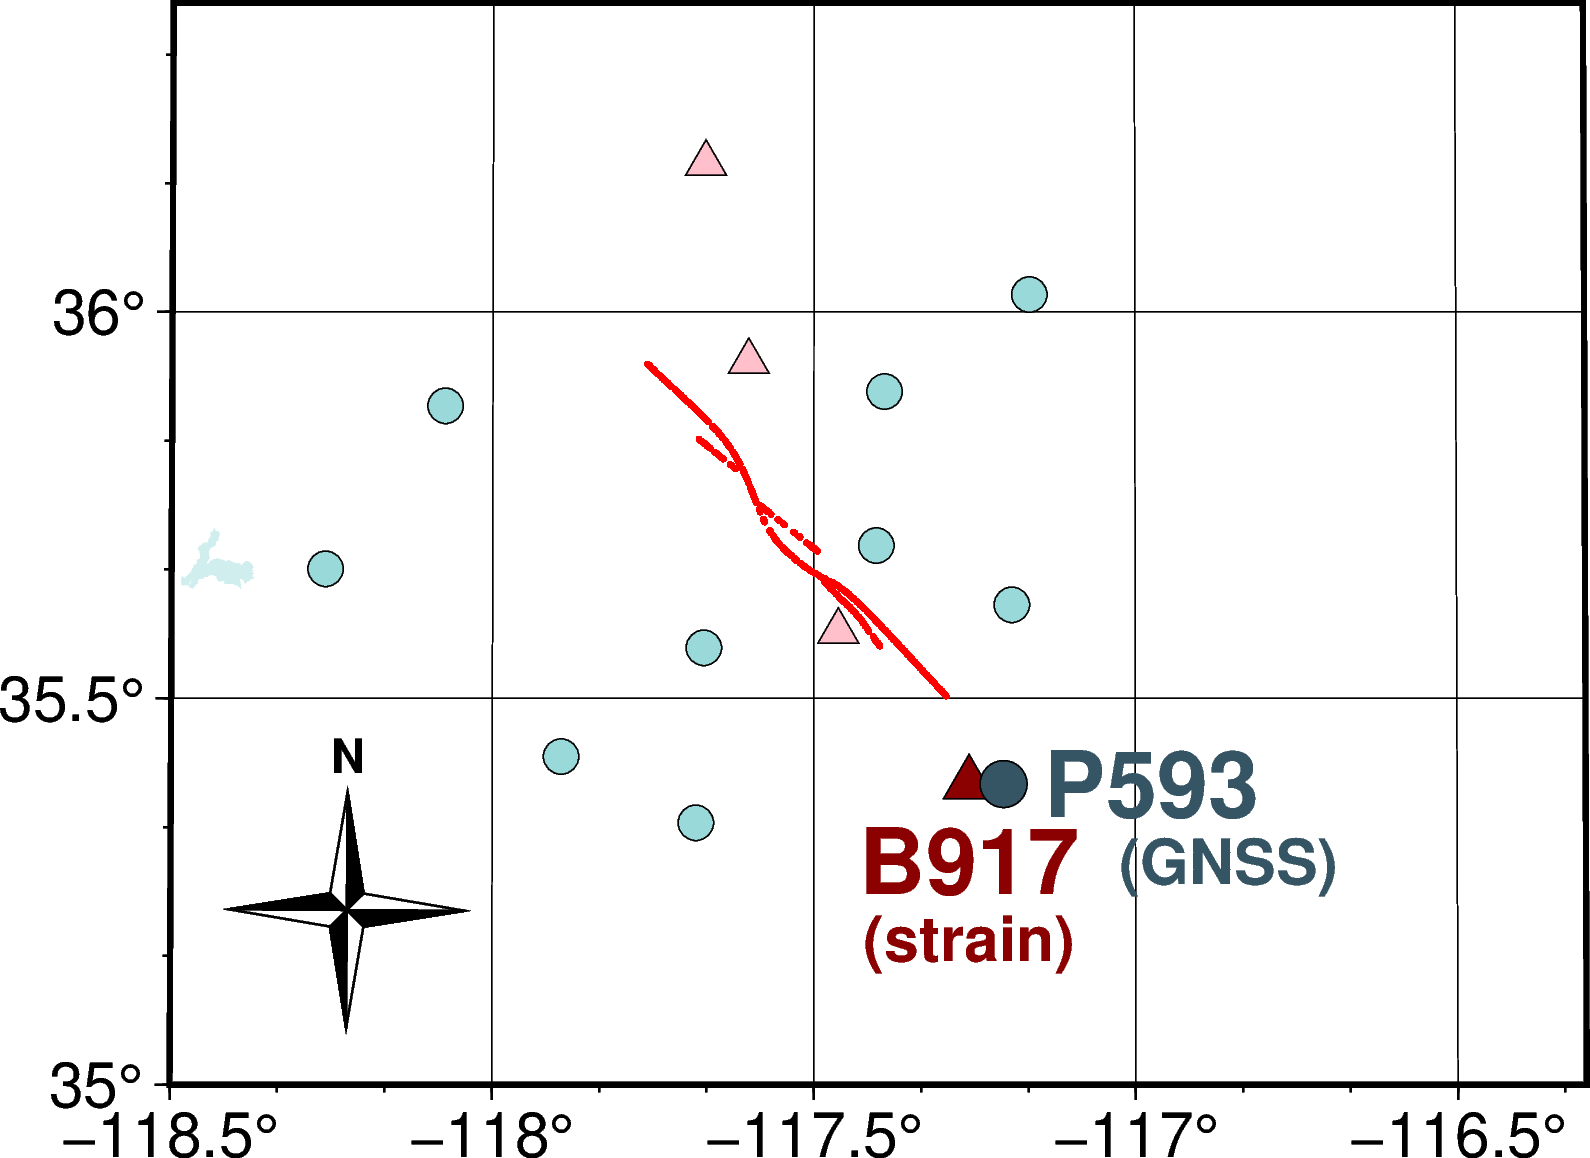

In [137]:
# US stations

fig = pygmt.Figure()

# fig.coast(region=[-150,210,-90,90], projection = "N12c", land = "wheat4", water = "lightcyan2", frame = "afg")
fig.coast(region=[-118.5,-116.3,35,36.4], projection = "N12c", land = 'white', water = "lightcyan2", frame = "afg")
fig.basemap(region=[-118.5,-116.3,35,36.4], rose = "JMC+w2c+f1+l,,,N+o-4.5c/-3.1c")

# Strain stations
fig.plot(x = bsm_mda.LONG, y = bsm_mda.LAT, style = "t0.4c", fill = "pink", pen = "black")
fig.plot(x = B917.LONG, y = B917.LAT, style = "t0.5c", fill = "darkred", pen = "black")

# GNSS stations
fig.plot(x = gnss_stas.lon, y = gnss_stas.lat, style = "c0.3c", fill = "#99D9D9", pen = "black")
fig.plot(x = P593.lon, y = P593.lat, style = "c0.4c", fill = "#355464", pen = "black")

# Subfaults
fig.plot(x = inv.lon, y = inv.lat, style = "c0.05", fill = "red")

# Labels
fig.text(text = B917.BNUM, x = B917.LONG, y = B917.LAT-0.1, font="22p,Helvetica-Bold,darkred")
fig.text(text = '(strain)', x = B917.LONG, y = B917.LAT-0.2, font="15p,Helvetica-Bold,darkred")
fig.text(text = 'P593', x = P593.lon+0.23, y = P593.lat, font="22p,Helvetica-Bold,#355464")
fig.text(text = '(GNSS)', x = P593.lon+0.35, y = P593.lat-0.1, font="15p,Helvetica-Bold,#355464")

fig.show();
fig.savefig('/Users/sydneydybing/StrainProject/2024/B917_P593_small_map_whitebckd.png');
